In [4]:
import lasio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
well = lasio.read("D:\Cшивка и увязка, двойные разностные\Для проекта\скважина 1.las")
well = well.df()
well_1 = well.reset_index()
well_1

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Ольга\AppData\Local\Temp\ipykernel_21348\2898247743.py:1: SyntaxWarning: invalid escape sequence '\C'
  well = lasio.read("D:\Cшивка и увязка, двойные разностные\Для проекта\скважина 1.las")


,DEPT,AK,BK,BK_3,DS,DS_2,DT_1,GGP,GGP_1,GK,GK_3,NNB,NNB_1,PS,PS_3
0,3650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.409
1,3650.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.669
2,3650.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.159
3,3650.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.266
4,3650.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5816,4231.6,NaN,19.58,NaN,197.33,NaN,NaN,NaN,NaN,6.630,NaN,9.580,NaN,207.652,NaN
5817,4231.7,NaN,18.74,NaN,197.52,NaN,NaN,NaN,NaN,6.932,NaN,9.451,NaN,207.554,NaN
5818,4231.8,NaN,18.79,NaN,197.64,NaN,NaN,NaN,NaN,7.059,NaN,9.240,NaN,207.476,NaN
5819,4231.9,NaN,18.22,NaN,197.66,NaN,NaN,NaN,NaN,7.031,NaN,8.980,NaN,207.437,NaN


In [6]:
print(well_1.keys())  

Index(['DEPT', 'AK', 'BK', 'BK_3', 'DS', 'DS_2', 'DT_1', 'GGP', 'GGP_1', 'GK',
       'GK_3', 'NNB', 'NNB_1', 'PS', 'PS_3'],
      dtype='object')


In [7]:
def plot_las(logs_for_print):
  fig = plt.figure(figsize=(40,14))
  ax = fig.subplots(1, logs_for_print.columns.drop(['DEPT']).shape[0]) 
  for i, log in enumerate(logs_for_print.drop(['DEPT'], axis = 1)):
    if ((logs_for_print[log].dtype != 'object')):
      curve = np.empty(logs_for_print[log].values.shape)
      curve[:] = np.nan
      curve = logs_for_print[log]
      ax[i].plot(curve, logs_for_print.DEPT)
      ax[i].invert_yaxis()
      ax[i].set_title(log)


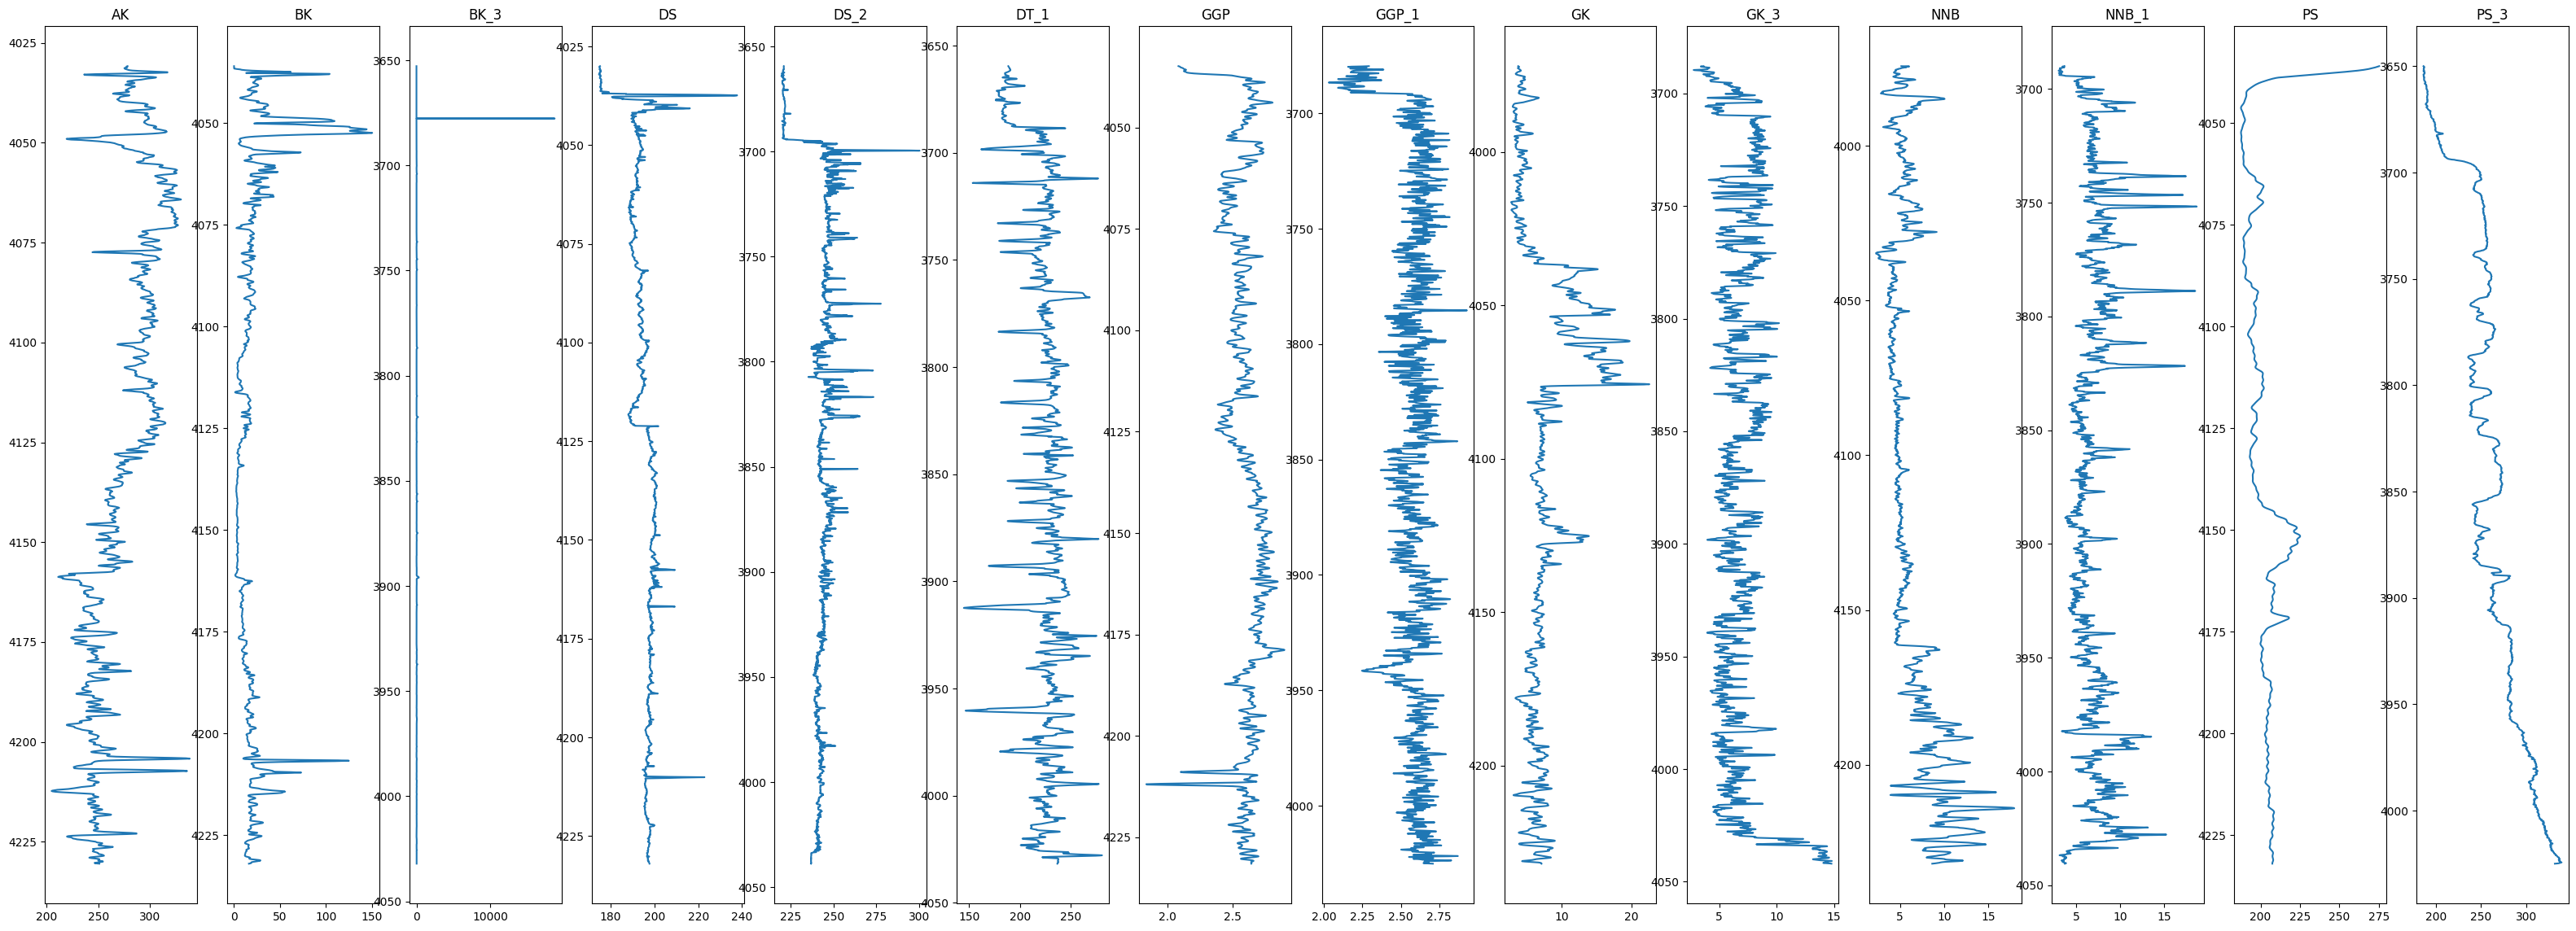

In [8]:
plot_las(well_1)

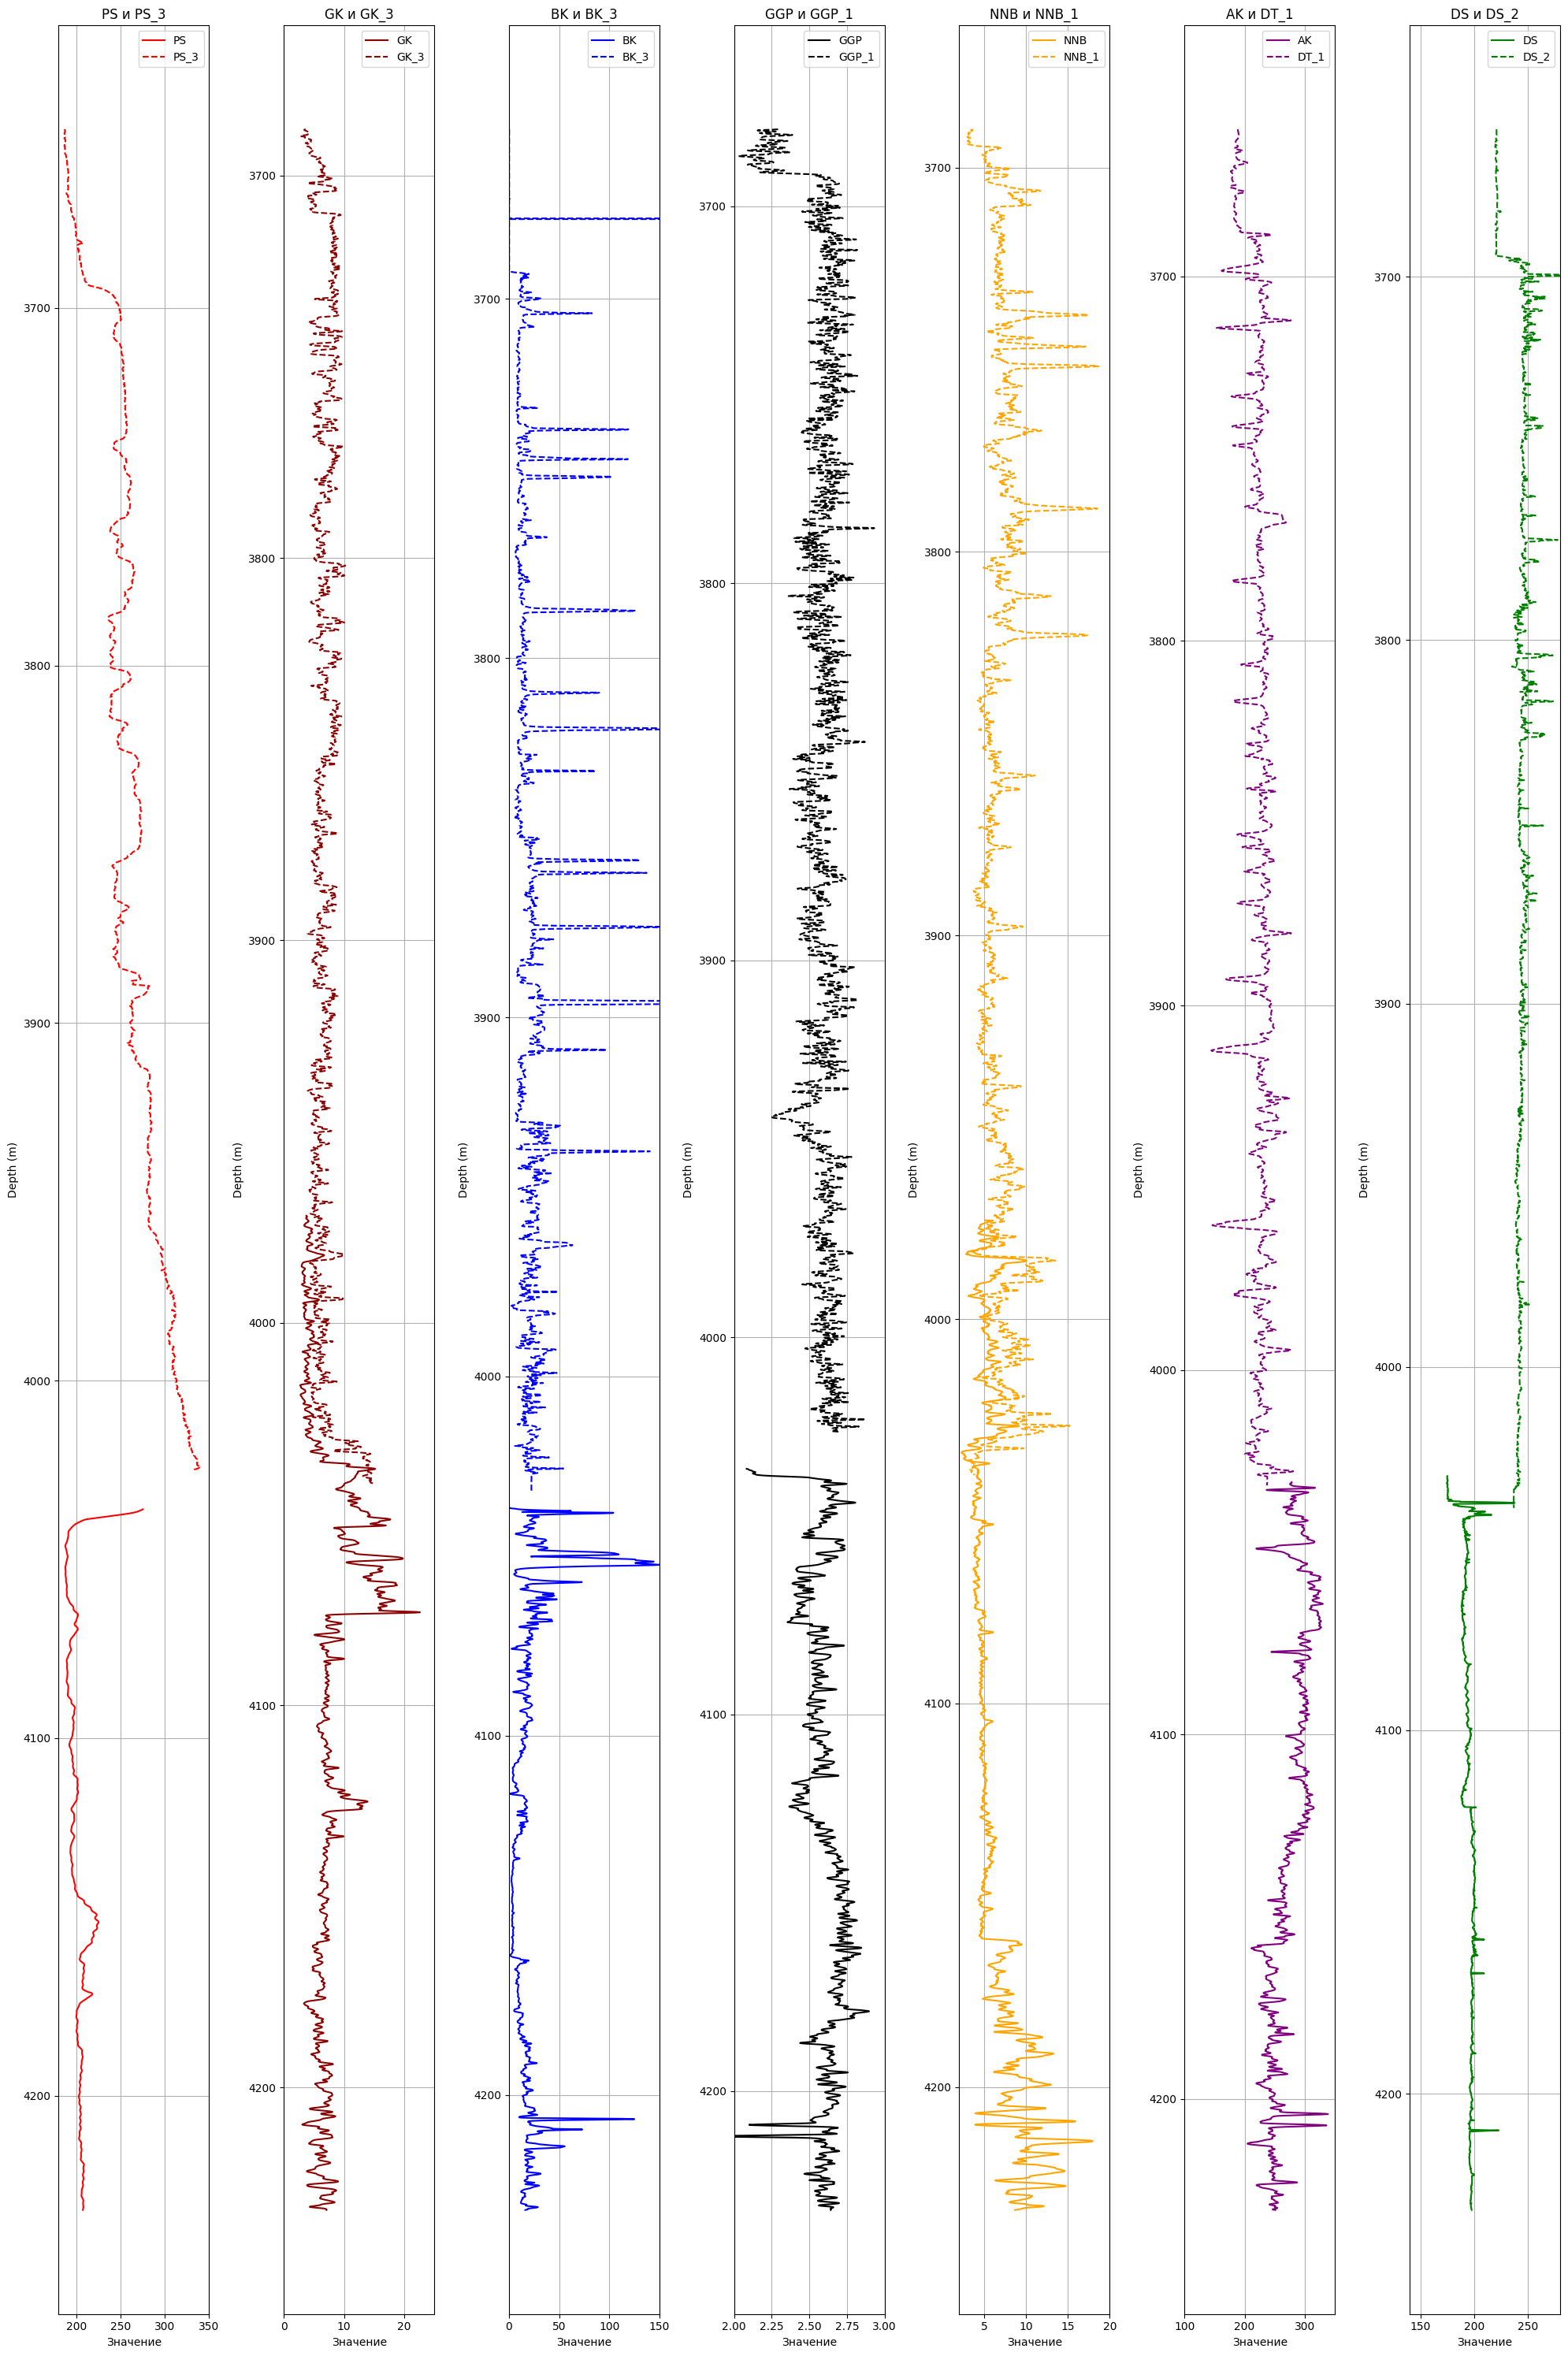

In [9]:
import matplotlib.pyplot as plt

def plot_well_curves(well_data, curve, curve_2, colors, scales):
    
    fig, axes = plt.subplots(1, len(curve), figsize=(20, 30))  
    
    for i, (curve, curve_2, color, (min_scale, max_scale)) in enumerate(zip(curve, curve_2, colors, scales)):
        ax = axes[i]  
        ax.plot(well_data[curve], well_data['DEPT'], color=color, label=curve)
        ax.plot(well_data[curve_2], well_data['DEPT'], color=color, linestyle='--', label=curve_2)
        
        ax.set_xlim(min_scale, max_scale)  
        ax.set_xlabel("Значение")
        ax.set_ylabel("Depth (m)")
        ax.invert_yaxis()  
        ax.grid(True)  
        ax.legend()  
        ax.set_title(f"{curve} и {curve_2}")  

    plt.tight_layout()
    plt.show()

curve = ['PS', 'GK', 'BK', 'GGP', 'NNB', 'AK', 'DS']
curve_2 = ['PS_3', 'GK_3', 'BK_3', 'GGP_1', 'NNB_1', 'DT_1', 'DS_2']
colors = ["red", "darkred", "blue", "black", "orange", "purple", "green"]
scales = [(180, 350), (0, 25), (0, 150), (2, 3), (2, 20), (100, 350), (140, 280)]

plot_well_curves(well_1, curve, curve_2, colors, scales)

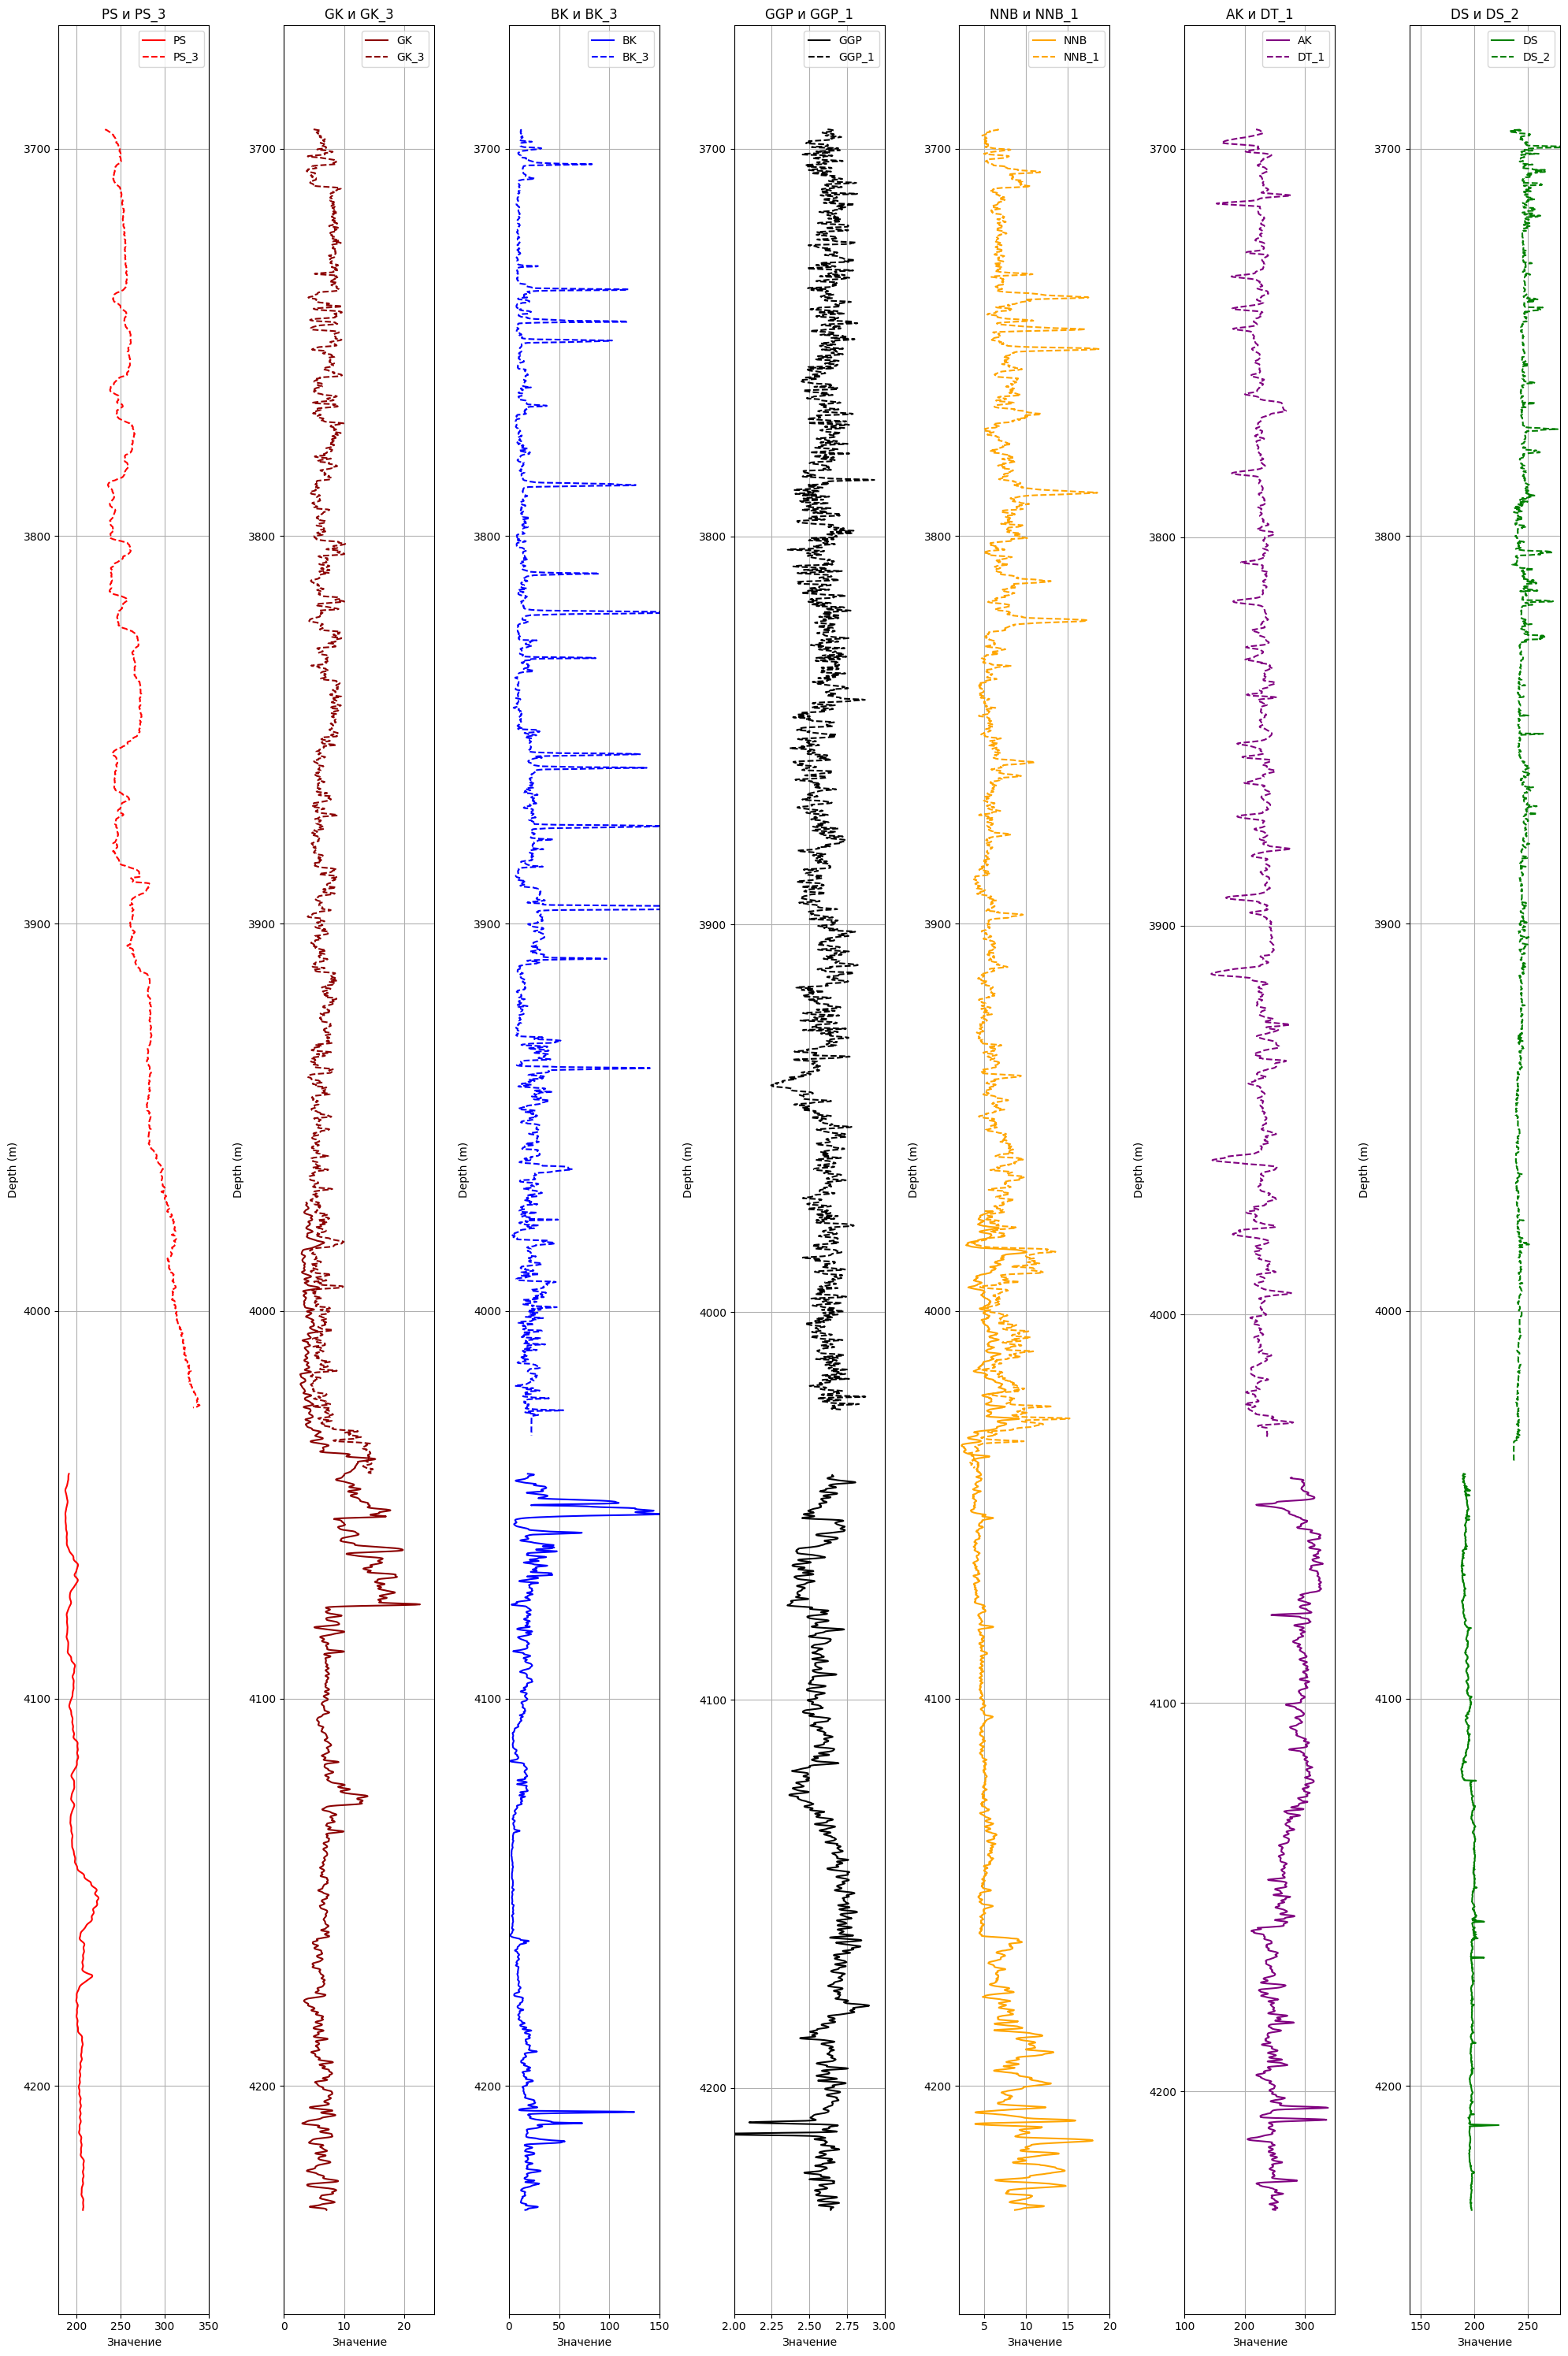

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_well_curves(well_1, curve, curve_2, colors, scales, depth_min=None, depth_max=None):
 
    # Фильтруем основной набор данных по глубине
    if depth_min is not None and depth_max is not None:
        well_1_cut = well_1[(well_1['DEPT'] >= depth_min) & (well_1['DEPT'] <= depth_max)]
    else:
        well_1_cut = well_1

     
    specific_curves = ['PS', 'BK', 'GGP', 'AK', 'DS']  
    well_1_cut.loc[well_1_cut['DEPT'] < 4042,  specific_curves] = np.nan
    
    fig, axes = plt.subplots(1, len(curve), figsize=(20, 30))  
    
    # Проходим по кривым и строим их
    for i, (c1, c2, color, (min_scale, max_scale)) in enumerate(zip(curve, curve_2, colors, scales)):
        ax = axes[i]
       
        # Строим основную кривую (curve)
        ax.plot(well_1_cut[c1], well_1_cut['DEPT'], color=color, label=c1)
        
        # Строим вторую кривую (curve_2) с отдельной фильтрацией
        ax.plot(well_1_cut[c2], well_1_cut['DEPT'], color=color, linestyle='--', label=c2)
        ax.set_xlim(min_scale, max_scale)  
        ax.set_xlabel("Значение")
        ax.set_ylabel("Depth (m)")
        ax.invert_yaxis() 
        ax.grid(True)  
        ax.legend()  
        ax.set_title(f"{c1} и {c2}") 
    
    plt.tight_layout()
    plt.show()
    return well_1_cut
well_1_cut = plot_well_curves( well_1, curve, curve_2, colors, scales, depth_min=3695, depth_max=4250)


C:\Users\Ольга\AppData\Local\Temp\ipykernel_21348\2672428796.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_1_cut1[f"{curve_1}_shifted"] = well_1_cut1[curve_1] + shift_value


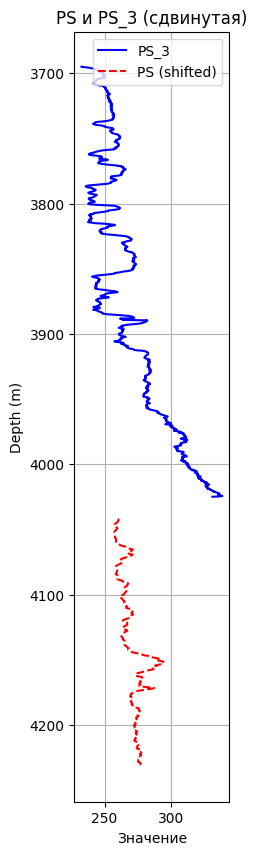

C:\Users\Ольга\AppData\Local\Temp\ipykernel_21348\2672428796.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_1_cut1[f"{curve_1}_shifted"] = well_1_cut1[curve_1] + shift_value


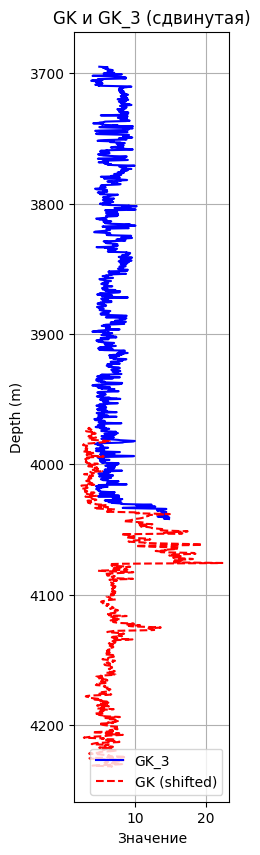

C:\Users\Ольга\AppData\Local\Temp\ipykernel_21348\2672428796.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_1_cut1[f"{curve_1}_shifted"] = well_1_cut1[curve_1] + shift_value


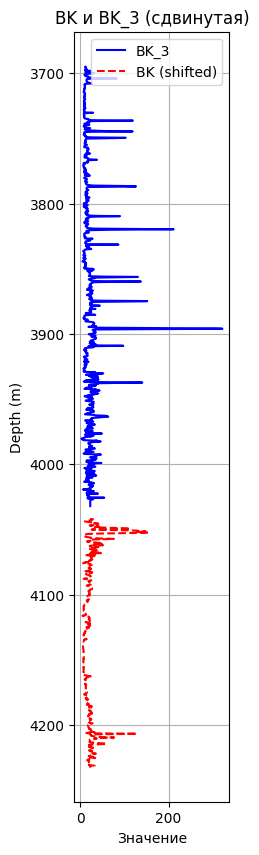

C:\Users\Ольга\AppData\Local\Temp\ipykernel_21348\2672428796.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_1_cut1[f"{curve_1}_shifted"] = well_1_cut1[curve_1] + shift_value


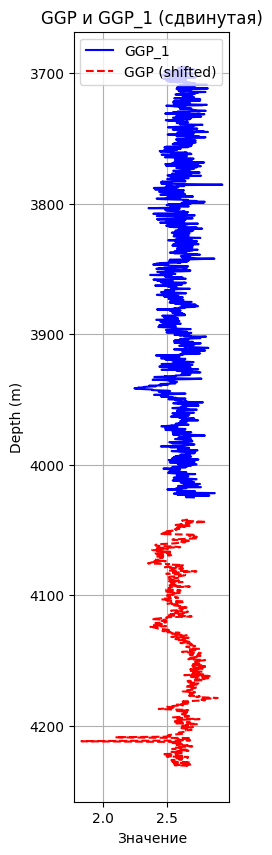

C:\Users\Ольга\AppData\Local\Temp\ipykernel_21348\2672428796.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_1_cut1[f"{curve_1}_shifted"] = well_1_cut1[curve_1] + shift_value


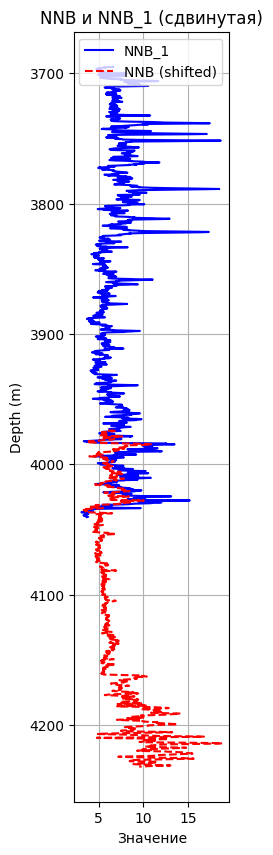

C:\Users\Ольга\AppData\Local\Temp\ipykernel_21348\2672428796.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_1_cut1[f"{curve_1}_shifted"] = well_1_cut1[curve_1] + shift_value


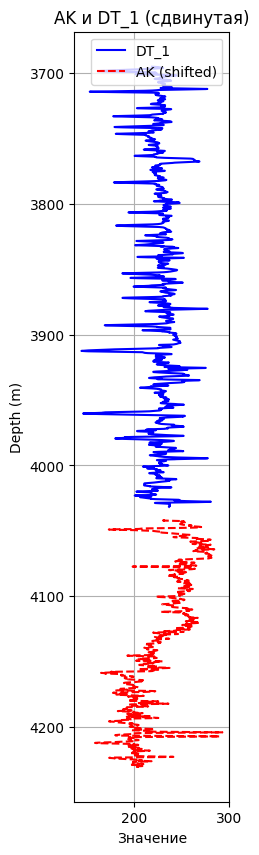

C:\Users\Ольга\AppData\Local\Temp\ipykernel_21348\2672428796.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_1_cut1[f"{curve_1}_shifted"] = well_1_cut1[curve_1] + shift_value


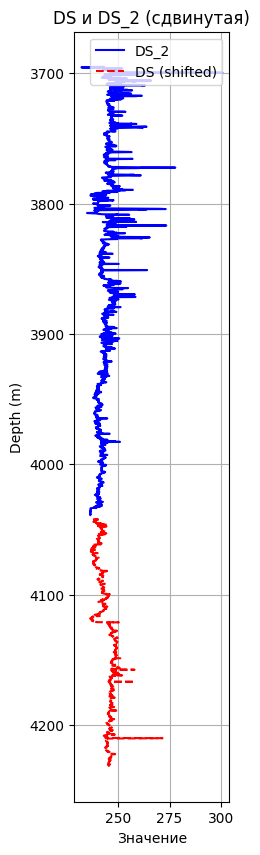

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def shift_and_plot_curves(well_1_cut, curves_1, curves_2, depth_col="DEPT"):
    
    # Копируем данные, чтобы не изменять исходный DataFrame
    well_1_cut1 = well_1_cut

    # Строим графики для каждой пары кривых
    for curve_1, curve_2 in zip(curves_1, curves_2):
        # Вычисляем среднее значение разницы между кривыми
        shift_value = well_1_cut1[curve_2].mean() - well_1_cut1[curve_1].mean()

        # Сдвигаем первую кривую
        well_1_cut1[f"{curve_1}_shifted"] = well_1_cut1[curve_1] + shift_value


        plt.figure(figsize=(2, 10))
        plt.plot(well_1_cut1[curve_2], well_1_cut1[depth_col], label=curve_2, color='blue')
        plt.plot(well_1_cut1[f"{curve_1}_shifted"], well_1_cut1[depth_col], label=f"{curve_1} (shifted)", color='red', linestyle='--')
        plt.xlabel("Значение")
        plt.ylabel("Depth (m)")
        plt.gca().invert_yaxis()  # Инвертируем ось Y (глубина увеличивается вниз)
        plt.grid(True)
        plt.legend()
        plt.title(f"{curve_1} и {curve_2} (сдвинутая)")
        plt.show()
    return well_1_cut1
curves_1 = ['PS', 'GK', 'BK', 'GGP', 'NNB', 'AK', 'DS']
curves_2 = ['PS_3', 'GK_3', 'BK_3', 'GGP_1', 'NNB_1', 'DT_1', 'DS_2']

well_1_cut1 = shift_and_plot_curves(well_1_cut, curves_1, curves_2)

In [12]:
print(well_1_cut1.head)

<bound method NDFrame.head of         DEPT  AK     BK   BK_3      DS    DS_2     DT_1  GGP  GGP_1     GK  \
450   3695.0 NaN    NaN  11.78     NaN  242.71  218.908  NaN  2.621    NaN   
451   3695.1 NaN    NaN  11.92     NaN  242.46  221.519  NaN  2.641    NaN   
452   3695.2 NaN    NaN  12.14     NaN  237.43  223.894  NaN  2.654    NaN   
453   3695.3 NaN    NaN  11.81     NaN  243.52  225.533  NaN  2.661    NaN   
454   3695.4 NaN    NaN  11.68     NaN  235.17  226.242  NaN  2.663    NaN   
...      ...  ..    ...    ...     ...     ...      ...  ...    ...    ...   
5816  4231.6 NaN  19.58    NaN  197.33     NaN      NaN  NaN    NaN  6.630   
5817  4231.7 NaN  18.74    NaN  197.52     NaN      NaN  NaN    NaN  6.932   
5818  4231.8 NaN  18.79    NaN  197.64     NaN      NaN  NaN    NaN  7.059   
5819  4231.9 NaN  18.22    NaN  197.66     NaN      NaN  NaN    NaN  7.031   
5820  4232.0 NaN  16.21    NaN  197.72     NaN      NaN  NaN    NaN  7.101   

      ...  NNB_1       PS     PS_

C:\Users\Ольга\AppData\Local\Temp\ipykernel_21348\1884004727.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_1_cut1[name] = well_1_cut1[longer_curve].combine_first(well_1_cut1[shorter_curve])
C:\Users\Ольга\AppData\Local\Temp\ipykernel_21348\1884004727.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_1_cut1[name] = well_1_cut1[longer_curve].combine_first(well_1_cut1[shorter_curve])
C:\Users\Ольга\AppData\Local\Temp\ipykernel_21348\1884004727.py:29: SettingWithCopyWarning: 
A value is tryi

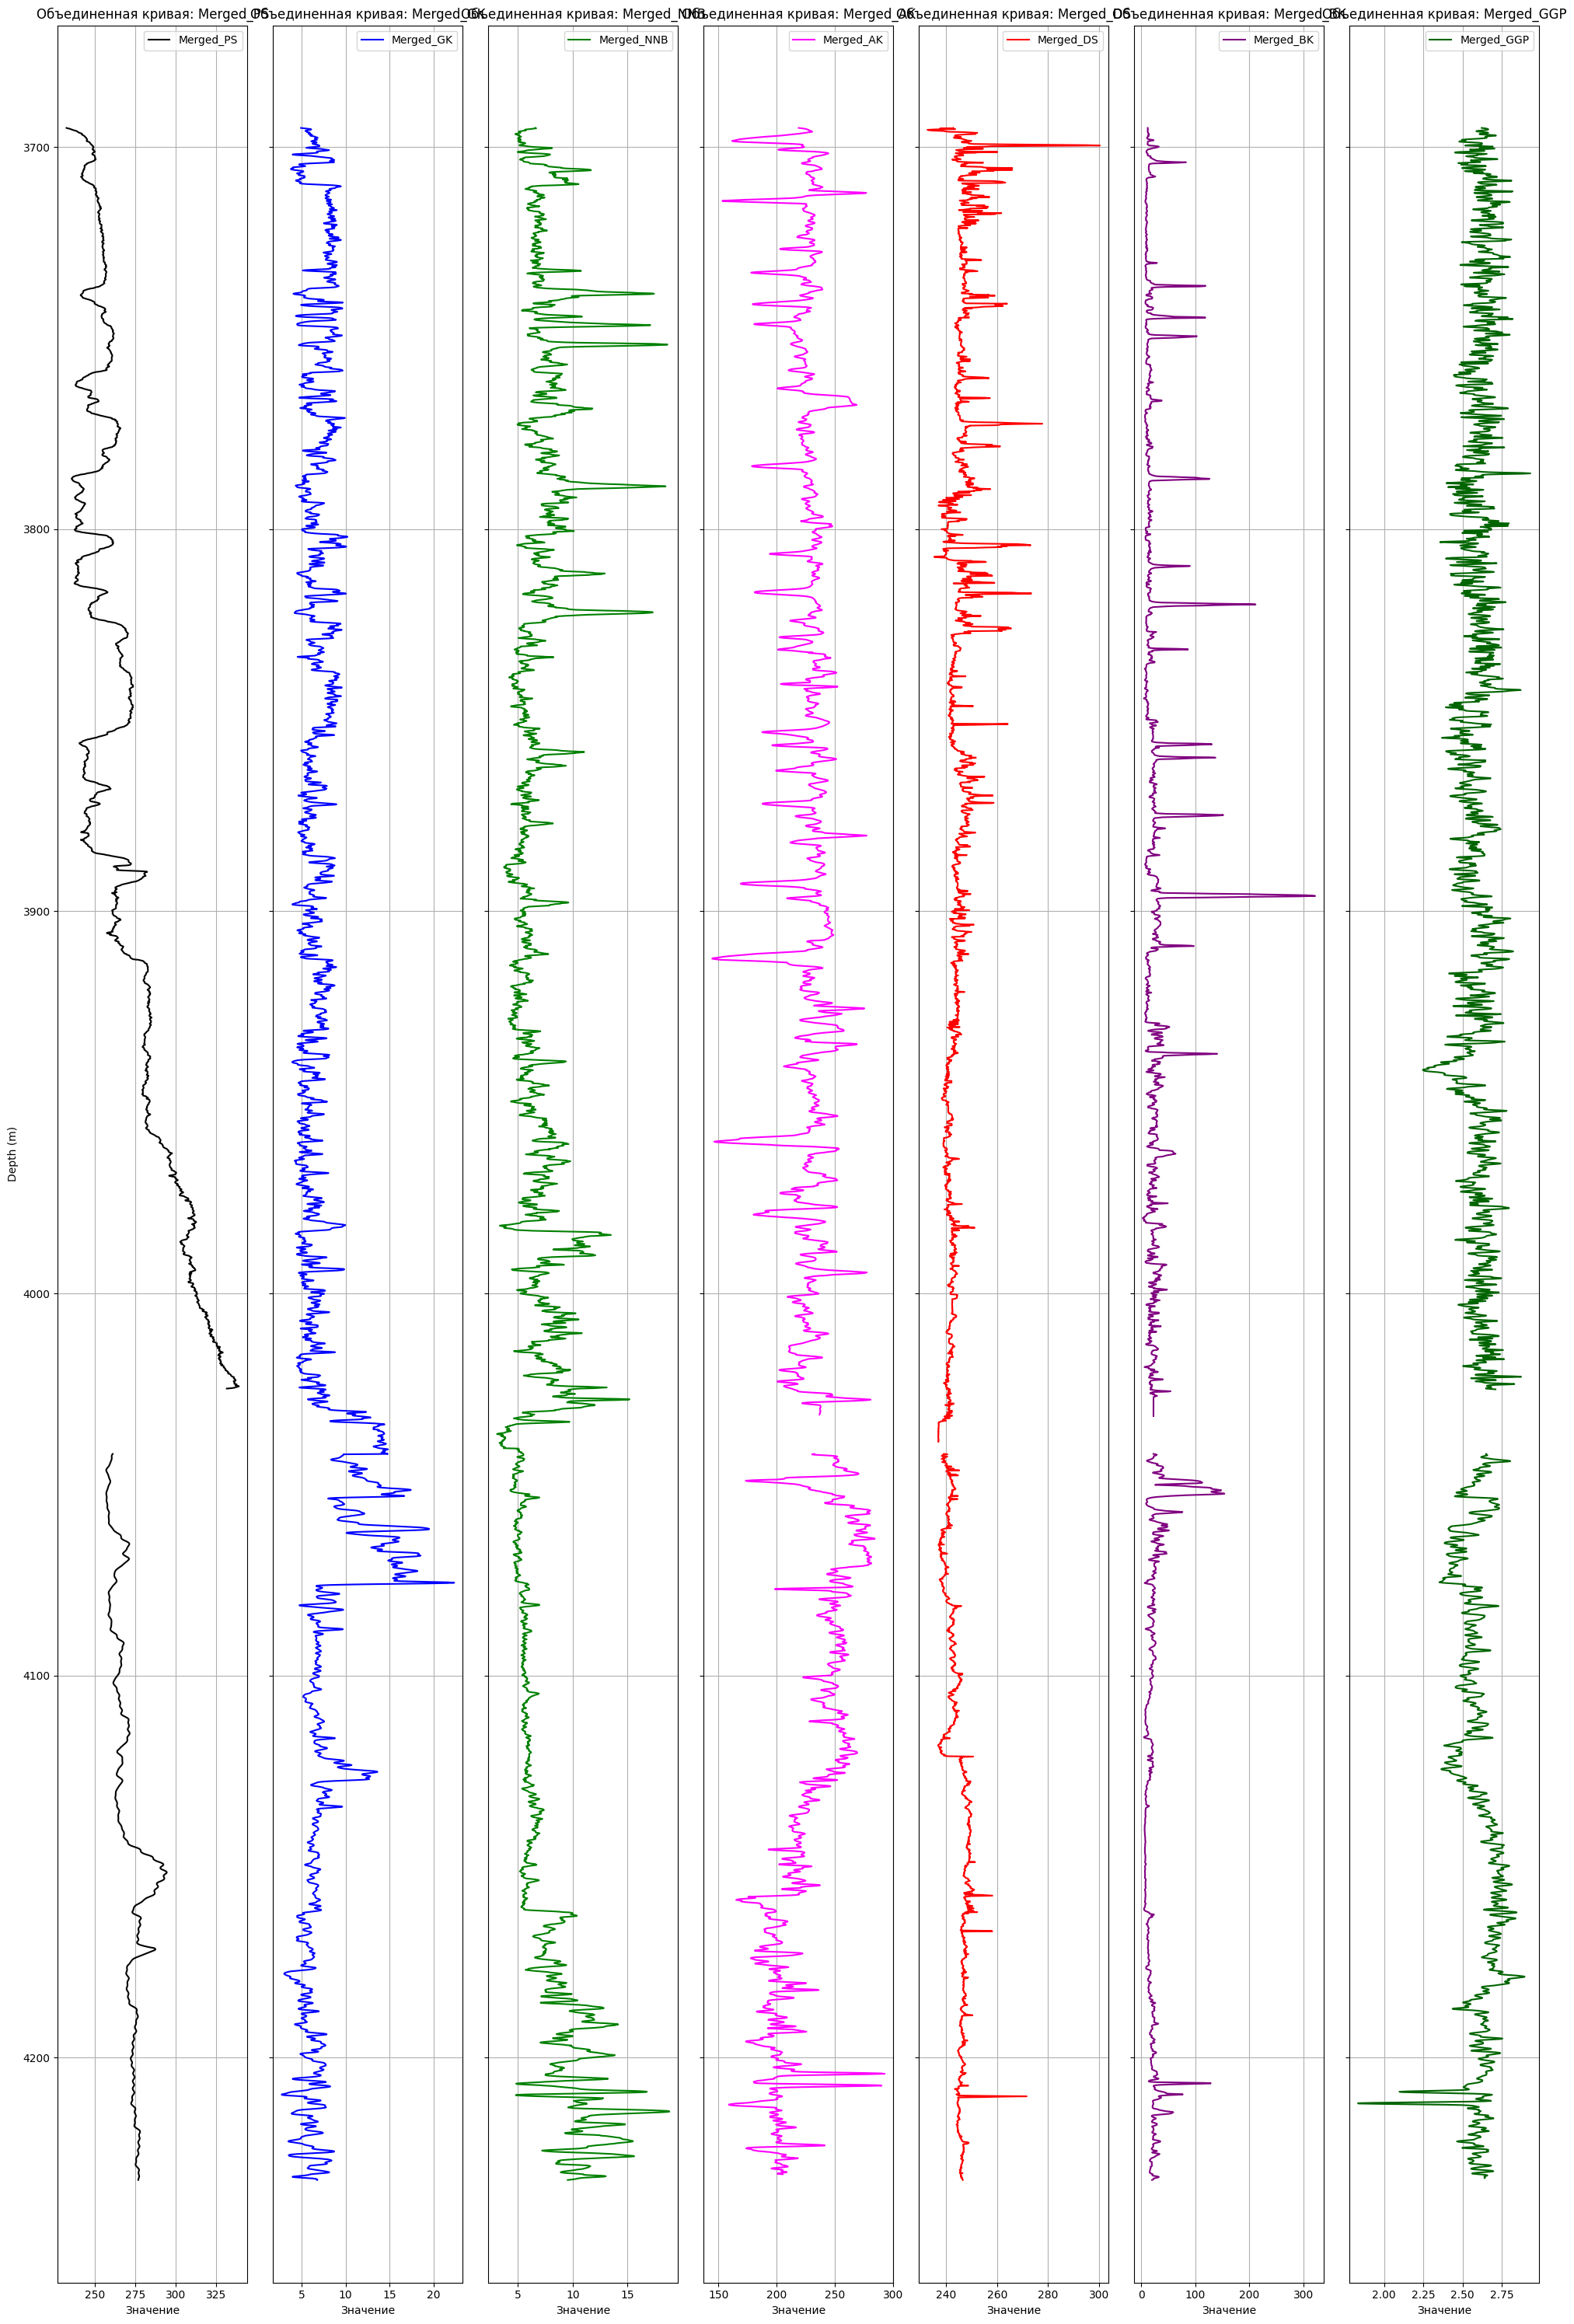

In [14]:
# Список пар кривых для объединения
curve_pairs = [('PS_shifted', 'PS_3'), ('GK_shifted', 'GK_3'), ('NNB_shifted', 'NNB_1'), 
               ('AK_shifted', 'DT_1'), ('DS_shifted', 'DS_2'), ('BK_shifted', 'BK_3'), 
               ('GGP_shifted', 'GGP_1')]

colors = ["black", "blue", "green", "magenta", "red", "purple", "darkgreen"]
scales = [(150, 350), (0, 25), (0, 150), (2, 3), (2, 20), (100, 350)]

num_curves = len(curve_pairs)
fig, axes = plt.subplots(nrows=1, ncols=num_curves, figsize=(20, 30), sharey=True)
if num_curves == 1:
    axes = [axes]

# Проходим по каждой паре кривых и строим графики
for idx, (i, j) in enumerate(curve_pairs):
    name = f'Merged_{i.split("_")[0]}' 

    # Определяем длинную и короткую кривую
    if well_1_cut1[i].notna().sum() > well_1_cut1[j].notna().sum():
        longer_curve, shorter_curve = i, j
    else:
        longer_curve, shorter_curve = j, i

    # Проверяем, есть ли пересечение
    min_depth_short = well_1_cut1[shorter_curve].dropna().index.min()
    max_depth_long = well_1_cut1[longer_curve].dropna().index.max()

        # Если есть пересечение → просто объединяем без интерполяции
    well_1_cut1[name] = well_1_cut1[longer_curve].combine_first(well_1_cut1[shorter_curve])
        
    ax = axes[idx]
    ax.plot(well_1_cut1[name], well_1_cut1['DEPT'], label=name, color = colors[idx])
    ax.set_xlabel("Значение")
    ax.grid(True)
    ax.legend()
    ax.set_title(f"Объединенная кривая: {name}")
axes[0].set_ylabel("Depth (m)")
for ax in axes:
    ax.invert_yaxis()  # Инвертируем ось Y (глубина увеличивается вниз)
plt.tight_layout()
plt.show()

In [15]:
well_1_cut1.columns

Index(['DEPT', 'AK', 'BK', 'BK_3', 'DS', 'DS_2', 'DT_1', 'GGP', 'GGP_1', 'GK',
       'GK_3', 'NNB', 'NNB_1', 'PS', 'PS_3', 'PS_shifted', 'GK_shifted',
       'BK_shifted', 'GGP_shifted', 'NNB_shifted', 'AK_shifted', 'DS_shifted',
       'Merged_PS', 'Merged_GK', 'Merged_NNB', 'Merged_AK', 'Merged_DS',
       'Merged_BK', 'Merged_GGP'],
      dtype='object')

In [16]:
min_interval = (3960, 3970)  # Пласт для минимального значения ГК
max_interval = (4060, 4080)  # Пласт для максимального значения ГК

# Среднее значение
mean_min = well_1_cut1.loc[(well_1_cut1["DEPT"] >= min_interval[0]) & (well_1_cut1["DEPT"] <= min_interval[1]), 'Merged_GK'].mean()
mean_max = well_1_cut1.loc[(well_1_cut1["DEPT"] >= max_interval[0]) & (well_1_cut1["DEPT"] <= max_interval[1]), 'Merged_GK'].mean()

# Оптимальное значение (медиана)
optimal_min = well_1_cut1.loc[(well_1_cut1["DEPT"] >= min_interval[0]) & (well_1_cut1["DEPT"] <= min_interval[1]), 'Merged_GK'].median()
optimal_max = well_1_cut1.loc[(well_1_cut1["DEPT"] >= max_interval[0]) & (well_1_cut1["DEPT"] <= max_interval[1]), 'Merged_GK'].median()

diff_mean = mean_max - mean_min
diff_optimal = optimal_max - optimal_min

# Расчет дГК по двум методикам
# 1: Использование средних значений
well_1_cut1['DGK_mean'] = (well_1_cut1['Merged_GK'] - mean_min) / (mean_max - mean_min)

# 2: Использование оптимальных значений
well_1_cut1['DGK_optimal'] = (well_1_cut1['Merged_GK'] - optimal_min) / (optimal_max - optimal_min)

# Ограничение значений дГК в диапазоне [0, 1]
well_1_cut1['DGK_mean'] = well_1_cut1['DGK_mean'].clip(0, 1)
well_1_cut1['DGK_optimal'] = well_1_cut1['DGK_optimal'].clip(0, 1)

C:\Users\Ольга\AppData\Local\Temp\ipykernel_21348\2004188347.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_1_cut1['DGK_mean'] = (well_1_cut1['Merged_GK'] - mean_min) / (mean_max - mean_min)
C:\Users\Ольга\AppData\Local\Temp\ipykernel_21348\2004188347.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well_1_cut1['DGK_optimal'] = (well_1_cut1['Merged_GK'] - optimal_min) / (optimal_max - optimal_min)
C:\Users\Ольга\AppData\Local\Temp\ipykernel_21348\2004188347.py:23: SettingWithCopyWarning: 
A v

In [17]:
fig, axes = plt.subplots(ncols=2, nrows=1, sharey=True, figsize=(5, 10))

# Левый график: Merged_GK
ax_left = axes[0]

# Кривая Merged_GK
ax_left.plot(well_1_cut1['Merged_GK'], well_1_cut1['DEPT'], color='black', lw=0.5, label='Merged_GK')

# Вертикальные линии
ax_left.axvline(x=mean_min, color='blue', lw=1, label='Mean Min')  
ax_left.axvline(x=mean_max, color='red', lw=1, label='Mean Max')  
ax_left.axvline(x=optimal_min, color='orange', lw=1, label='Optimal Min')
ax_left.axvline(x=optimal_max, color='green', lw=1, label='Optimal Max') 

ax_left.set_xlim(0, 23)  
ax_left.set_ylim(4235, 3650) 
ax_left.spines['top'].set_edgecolor('black')
ax_left.set_xlabel('Merged_GK') 
ax_left.set_ylabel('Depth (m)') \
ax_left.xaxis.set_ticks_position("top") 
ax_left.xaxis.set_label_position("top")
ax_left.grid(True) 
ax_left.legend(loc='upper right') 

ax_right = axes[1]

ax_right.plot(well_1_cut1['DGK_mean'], well_1_cut1['DEPT'], color='red', lw=0.5, label='DGK_mean') 
ax_right.plot(well_1_cut1['DGK_optimal'], well_1_cut1['DEPT'], color='green', lw=0.5, label='DGK_optimal')

ax_right.set_xlim(0, 1)  
ax_right.set_ylim(4235, 3650) 
ax_right.spines['top'].set_edgecolor('black')
ax_right.set_xlabel('DGK_mean / DGK_optimal') 
ax_right.xaxis.set_ticks_position("top")
ax_right.xaxis.set_label_position("top") 
ax_right.grid(True)
ax_right.legend(loc='upper right')


SyntaxError: invalid syntax (654248824.py, line 20)